In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

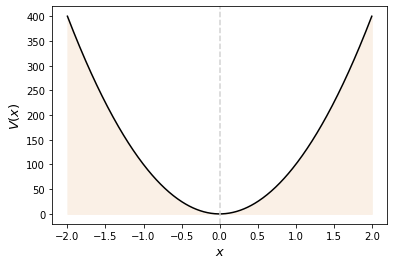

In [ ]:
#-- potential potential

V0 = 250.0


#-- symmeteric harmonic potential well
def V(x):
  pot = 100 * x**2.0

  return pot

#-- finite square well
def V(x):
    if (np.abs(x) <= 0.5):
      return 0.0

    else:
      return V0

#-- finite square well with a bump
def V(x):
    if (np.abs(x) <= 0.5):
      if (x <= 0.0):
        return 50.0
      else:
        return 0.0

    else:
      return V0

#-- finite half-harmonic potential well
def V(x):
  pot = 100 * x**2.0
  if (x >=0.0):
    return pot
  else:
    return 50000.0

#-- symmeteric harmonic potential well
def V(x):
  pot = 100 * x**2.0

  return pot

vectorV = np.vectorize(V)

plt.figure()
xx = np.linspace(-2., 2., 501)
plt.plot(xx, vectorV(xx), 'k-')
plt.fill_between(xx, vectorV(xx), color='linen')
plt.axvline(0, ls='--', color='lightgrey')
plt.xlabel(r'$x$', fontsize=13)
plt.ylabel(r'$V(x)$', fontsize=13)
plt.show()

In [ ]:
def gradient_second_order(y, dx=1):
    """Returns second order accurate derivative of y using constant step size dx."""

    d2y = np.zeros_like(y)

    # Second order forward difference for first element
    d2y[0] = -(3*y[0] - 4*y[1] + y[2]) / (2*dx)

    # Central difference interior elements
    d2y[1:-1] = (y[2:] - y[0:-2])/(2*dx)

    # Backwards difference final element
    d2y[-1] = (3*y[-1] - 4*y[-2] + y[-3]) / (2*dx)

    return d2y

In [ ]:
def calc_expE(x, psi, Vpot):

  #-- normalise the wavefunction
  psi = psi/np.linalg.norm(psi)

  spl = splrep(x, psi, k=3) # no smoothing, 3rd order spline
  d2psi = splev(x, spl, der=2) # second derivative

  Vpsi = Vpot(x) * psi

  E_n = -np.dot(psi, d2psi) + np.dot(psi, Vpsi) #-- energy expectation value

  return E_n

In [ ]:
def calc_expE2(x, psi, Vpot):

  #-- normalise the wavefunction
  psi = psi/np.linalg.norm(psi)

  d2psi = gradient_second_order(psi, dx = (x[1]-x[0]))

  Vpsi = Vpot(x) * psi

  E_n = -np.dot(psi, d2psi) + np.dot(psi, Vpsi) #-- energy expectation value

  return E_n

81
Energy expectation value = 68.0160


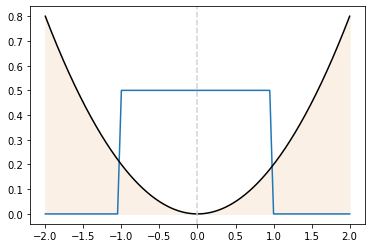

In [ ]:
dx = 0.05
x = np.arange(-2.0, 2.0+dx/2, dx)
psi0 = np.zeros(len(x))

for k in range(len(x)):
  if (np.abs(x[k]) <= 1.0):
    psi0[k] = 0.5

print (len(x))
print ('Energy expectation value = %.4f'%calc_expE(x, psi0, vectorV))

plt.figure()
plt.plot(x, psi0)

vscale=500
xx = np.linspace(-2., 2., 500)
plt.plot(xx, vectorV(xx)/vscale, 'k-')
plt.fill_between(xx, vectorV(xx)/vscale, color='linen')
plt.axvline(0, ls='--', color='lightgrey')

In [ ]:
psi = psi0/np.linalg.norm(psi0)
Eprev = calc_expE(x, psi, vectorV)
dpsi = 0.02

ntrials = 200000

#-- we will take snapshots
t_snapshot = np.array([0, 100, 1000, 2000, 5000, 10000, 20000, 35000, 50000])
psi_snapshot = psi

#-- Store the energy <E>
E = [Eprev]

for t in np.arange(0, ntrials):

  if (t%5000 == 0):
    print (t, Eprev)

  #- choose a random index
  i = np.random.randint(1, len(x)-1)

  #- change the wavefunction at that index by delta
  delta = dpsi * ( 2.0 * np.random.random_sample() - 1.0 )

  psi[i] = psi[i] + delta

  Enew = calc_expE(x, psi, vectorV)

  if Enew < Eprev: #- accept the change
    Eprev = Enew
    psi = psi/np.linalg.norm(psi)
    E.append(Eprev)

  else:   #- undo the change to the wavefunction
    psi[i] = psi[i] - delta

  if (t in t_snapshot[1:]):
    psi_snapshot = np.vstack( (psi_snapshot, psi) )



0 68.01601615137761
5000 18.88186048893546
10000 14.767797349975307
15000 13.333463705593527
20000 12.272198768027218
25000 11.700003179689293
30000 11.356586517401373
35000 11.139344595578475
40000 10.936922365781093
45000 10.792893424990378
50000 10.677017202756064
55000 10.59347467451838
60000 10.533548428105522
65000 10.484325682209764
70000 10.41820480762205
75000 10.382597153801033
80000 10.338435592153207
85000 10.306312936585003
90000 10.260405382060341
95000 10.23308655122134
100000 10.20851639189481
105000 10.193335429548007
110000 10.176094733067579
115000 10.167012887065031
120000 10.1589037533725
125000 10.14760701624903
130000 10.134099416896756
135000 10.128263075058909
140000 10.121867371417757
145000 10.11578754832762
150000 10.108522175815242
155000 10.103828289097791
160000 10.101227857139431
165000 10.096616859042433
170000 10.093951635721645
175000 10.091808936927695
180000 10.090008486906349
185000 10.085171901060395
190000 10.082345304010145
195000 10.08059060787

In [ ]:
print ('Ground state energy is = %.4f'%E[-1])

Ground state energy is = 10.0781


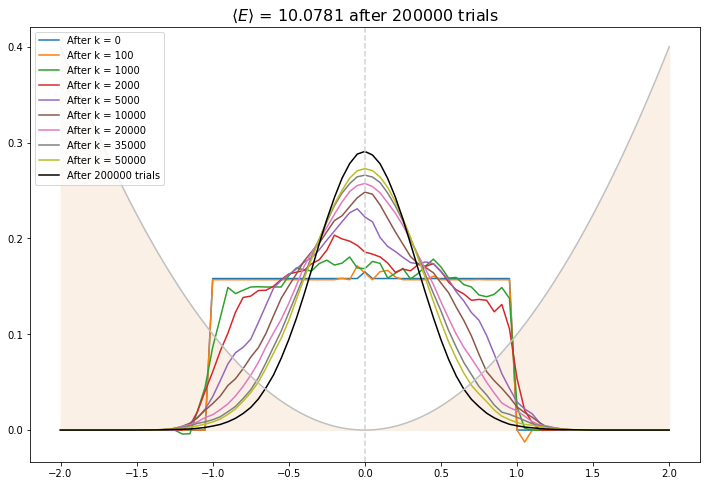

In [ ]:
plt.figure(figsize=(12, 8))

for j in np.arange(len(psi_snapshot)):
  plt.plot(x, psi_snapshot[j, :], label='After k = %d'%(t_snapshot[j]))

plt.plot(x, psi, 'k-', label='After %d trials'%(ntrials))

plt.title(r'$ \langle E \rangle$ = %.4f after %d trials'%(E[-1], ntrials), fontsize=16)

#-- potential (for reference)
vscale=1000
xx = np.linspace(-2., 2., 500)
plt.plot(xx, vectorV(xx)/vscale, '-', color='silver')
plt.fill_between(xx, vectorV(xx)/vscale, color='linen')
plt.axvline(0, ls='--', color='lightgrey')

plt.legend(loc='upper left')
plt.show()

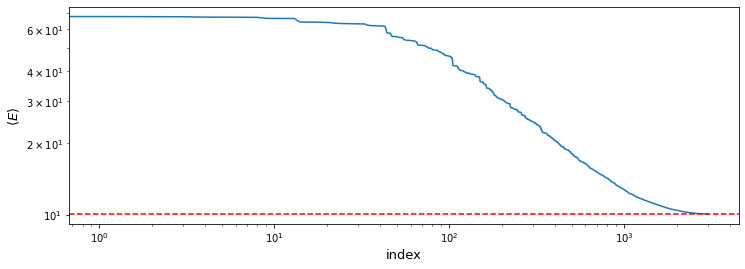

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(E)
plt.yscale('log')
plt.xscale('log')

plt.xlabel('index', fontsize=13)
plt.ylabel(r'$\langle E \rangle$', fontsize=13)
plt.axhline(E[-1], ls='--', color='r')
plt.show()